# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import pickle,json
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Data description

In [2]:
data = pd.read_csv("data/cleaned.csv")
data = data.dropna()
data.head(5)

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,"A caper comedy about two friends, Simo and Las...",Comedy,Finland,Finnish,334784.0,93296,86,Teemu Nikki,"Olli Rahkonen,Paula Vesala,Rami Rusinen"
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,"""Farewell, My Concubine"" is a movie with two p...","Drama,Music,Romance","China,Hong Kong",Mandarin,4000000.0,5985074,171,Kaige Chen,"Fengyi Zhang,Leslie Cheung,Li Gong"
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,"Jack Cole is a soft spoken, mystical, new age ...","Action,Comedy,Crime",USA,"Chinese,English,Russian",45000000.0,20351264,91,John Gray,"Bob Gunton,Keenen Ivory Wayans,Steven Seagal"
3,tt3170832,Room,2015.0,8.1,365849,"ROOM tells the extraordinary story of Jack, a ...","Drama,Thriller","Canada,Ireland,UK,USA",English,13000000.0,35401758,118,Lenny Abrahamson,"Brie Larson,Jacob Tremblay,Sean Bridgers"
4,tt0204175,Boys and Girls,2000.0,5.4,15942,"Jennifer and Ryan are students at UC Berkeley,...","Comedy,Drama,Romance",USA,English,35000000.0,25850615,94,Robert Iscove,"Brendon Ryan Barrett,Claire Forlani,Freddie Pr..."


## Convert string list to numeric

### Function definition

In [3]:
def caculateScore(data, columnName):
    names = data[['rating', columnName]]
    my_dict = {}
    n = len(names)
    for i in range(n):
        avgR, name = names.iloc[i,:]    
        for s in name:
            if s not in my_dict.keys():
                my_dict[s] = [avgR, 1]
            else:
                a = my_dict[s]
                a = [avgR + a[0], a[1] + 1]
                my_dict[s] = a
    for a in my_dict:
        score, n = my_dict[a]
        my_dict[a] = score/n
    return my_dict

def tfidf(x):
    s_w = ['is', 'are', 'they', 'them', 'him', 'if', 'so', 'an', 'and', 'as', 'by', \
           'for', 'he', 'her', 'his', 'in', 'is', 'of', 'on', 'she', 'that', 'the', 'their', 'they', 'to', 'who', 'with',\
          'him', 'i',
            'me',
            'my',
            'myself',
            'we',
            'our',
            'ours',
            'ourselves',
            'you',
            'your',
            'yours',
            'yourself',
            'yourselves',
            'he',
            'him',
            'his',
            'himself',
            'she',
            'her',
            'hers',
            'herself',
            'it',
            'its',
            'itself',
            'they',
            'them',
            'their',
            'theirs',
            'themselves',
            'what',
            'which',
            'who',
            'whom',
            'this',
            'that',
            'these',
            'those',
            'am',
            'is',
            'are',
            'was',
            'were',
            'be',
            'been',
            'being',
            'have',
            'has',
            'had',
            'having',
            'do',
            'does',
            'did',
            'doing',
            'a',
            'an',
            'the',
            'and',
            'but',
            'if',
            'or',
            'because',
            'as',
            'until',
            'while',
            'of',
            'at',
            'by',
            'for',
            'with',
            'about',
            'against',
            'between',
            'into',
            'through',
            'during',
            'before',
            'after',
            'above',
            'below',
            'to',
            'from',
            'up',
            'down',
            'in',
            'out',
            'on',
            'off',
            'over',
            'under',
            'again',
            'further',
            'then',
            'once',
            'here',
            'there',
            'when',
            'where',
            'why',
            'how',
            'all',
            'any',
            'both',
            'each',
            'few',
            'more',
            'most',
            'other',
            'some',
            'such',
            'no',
            'nor',
            'not',
            'only',
            'own',
            'same',
            'so',
            'than',
            'too',
            'very',
            's',
            't',
            'can',
            'will',
            'just',
            'don',
            'should',
            'now']
    vectorizer = TfidfVectorizer(max_features=5,stop_words=s_w)
    vectorizer.fit_transform(x)
    return vectorizer.get_feature_names()

def scoring(l):
    global d
    n = len(l)
    s = 0
    for ele in l:
        try:
            s += d[ele] 
        except:
            pass
    return s/n

def str_to_list(x):
    re = []
    tmp = x.split(",")
    for i,ele in enumerate(tmp):
        re.append(ele)
    return re

def clean_genre(x):
    x.sort()
    return ",".join(x)

def encoder_feature(x):
    tmp = df[x].unique()
    encoder.fit(tmp)
    df[x] = df[x].apply(lambda x: encoder.transform([x])[0])

### Convert 'stars'

In [4]:
d = caculateScore(data, 'stars')
star = data.stars.apply(scoring)

In [5]:
data.stars = star

### Convert 'director'

In [6]:
e = LabelEncoder()
e.fit(data.director.unique())
director = data.director.apply(lambda x: e.transform([x])[0])

In [7]:
data.director = director

### Convert 'language'

In [8]:
l = LabelEncoder()
l.fit(data.language.unique())
encoded_language = data.language.apply(lambda x: l.transform([x])[0])

In [9]:
data.language = encoded_language

### Convert 'story_line'

In [10]:
data['story_line'] = data['story_line'].apply(lambda x: tfidf([x]))

In [11]:
sl_map = caculateScore(data,'story_line')

In [12]:
#After using tfidf
sl_map

{'also': 6.4875,
 'baby': 6.4,
 'burglars': 6.4,
 'caper': 6.4,
 'simo': 6.4,
 'attempts': 6.574999999999999,
 'three': 6.425,
 'time': 6.14,
 'twentieth': 8.1,
 'two': 6.473076923076925,
 'angeles': 5.4,
 'ellen': 5.4,
 'jack': 6.172727272727273,
 'los': 6.2,
 'new': 5.870370370370369,
 '10': 7.0,
 'ma': 7.199999999999999,
 'room': 6.45,
 'typical': 8.1,
 'acquaintances': 5.35,
 'quick': 5.4,
 'response': 5.4,
 'ryan': 5.866666666666667,
 'serious': 5.4,
 'accusations': 6.5,
 'business': 5.8428571428571425,
 'kimberly': 6.5,
 'klein': 7.05,
 'school': 6.4,
 'beauty': 4.1,
 'finds': 5.55,
 'owner': 4.866666666666666,
 'romance': 4.1,
 'emma': 6.5,
 'matches': 6.7,
 'misguided': 6.7,
 'missteps': 6.7,
 'must': 6.44,
 'german': 7.45,
 'ivushkin': 6.6,
 'klaus': 6.6,
 'tank': 6.6,
 'tanks': 6.6,
 'brother': 5.76,
 'dog': 5.866666666666667,
 'older': 7.4,
 'parents': 6.133333333333334,
 'sister': 6.366666666666667,
 '50': 7.5,
 'adisheshan': 7.5,
 'crores': 7.5,
 'rs': 7.5,
 'sivaji': 7.5,

In [13]:
def generate_list(df, feature_name): #create a list of all unique feature values
    #Step 1: track all ratings associated with each feature in a dictionary
    feature_dict = {}
    for index, row in df.iterrows():
        feat = row[feature_name]
        for sub_feat in feat:
            if sub_feat not in feature_dict:
                feature_dict[sub_feat] = (df['rating'][index], 1) #
            else:
                feature_dict[sub_feat] = (feature_dict[sub_feat][0] + (df['rating'][index]), feature_dict[sub_feat][1] + 1)
    #Step 2: calculate average ratings for each feature
    for key in feature_dict:
        feature_dict[key] = feature_dict[key][0]/feature_dict[key][1] #average of all vote_averages
       
    #Step 3: create and sort a list of tuples (dictionary value, key)
    lst = list()
    for name in feature_dict:
        lst.append((feature_dict[name],name))
    lst = sorted(lst)
    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    for element in lst:
        feature_list.append(element[1])
    return feature_list

In [14]:
story_line_list = generate_list(data, 'story_line')

In [15]:
data.head()

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,"[also, baby, burglars, caper, simo]",Comedy,Finland,144,334784.0,93296,86,795,6.165869
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,"[attempts, three, time, twentieth, two]","Drama,Music,Romance","China,Hong Kong",187,4000000.0,5985074,171,445,6.187815
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,"[angeles, ellen, jack, los, new]","Action,Comedy,Crime",USA,46,45000000.0,20351264,91,386,6.149547
3,tt3170832,Room,2015.0,8.1,365849,"[10, jack, ma, room, typical]","Drama,Thriller","Canada,Ireland,UK,USA",64,13000000.0,35401758,118,485,6.154384
4,tt0204175,Boys and Girls,2000.0,5.4,15942,"[acquaintances, quick, response, ryan, serious]","Comedy,Drama,Romance",USA,64,35000000.0,25850615,94,696,6.161788


In [16]:
def calculate_bin_array(this_list, all_features):
    bin_list = []
    for element in all_features:
        if element in this_list:
            bin_list.append(1)
        else:
            bin_list.append(0)
    return bin_list

In [17]:
def w_avg1(arr):
    weight = 0
    cnt = 0
    for i in range(len(arr)):
        if arr[i] == 1:
            weight = weight+i
            cnt = cnt + 1
    return weight/cnt

In [18]:
def to_weighted_avg1(df, feature_names):
    for feature_name in feature_names:
        print('Current: ', feature_name)
        df[feature_name] = df[feature_name].apply(lambda x: w_avg1(x))
    return df

In [19]:
data['story_line'] = data['story_line'].apply(lambda x: calculate_bin_array(x, story_line_list))

In [20]:
data = to_weighted_avg1(data, ['story_line'])

Current:  story_line


In [21]:
data.head()

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,1581.0,Comedy,Finland,144,334784.0,93296,86,795,6.165869
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,1826.2,"Drama,Music,Romance","China,Hong Kong",187,4000000.0,5985074,171,445,6.187815
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,900.0,"Action,Comedy,Crime",USA,46,45000000.0,20351264,91,386,6.149547
3,tt3170832,Room,2015.0,8.1,365849,2081.4,"Drama,Thriller","Canada,Ireland,UK,USA",64,13000000.0,35401758,118,485,6.154384
4,tt0204175,Boys and Girls,2000.0,5.4,15942,607.4,"Comedy,Drama,Romance",USA,64,35000000.0,25850615,94,696,6.161788


### Convert 'genres'

In [22]:
g = LabelEncoder()
genres_distinct = data.genres.unique()
g.fit(genres_distinct)
labeled_genres = data.genres.apply(lambda x: g.transform([x])[0])

In [23]:
data.genres = labeled_genres

### Convert 'country'

In [24]:
c = LabelEncoder()
country_distinct = data.country.unique()
c.fit(country_distinct)
labeled_country = data.country.apply(lambda x: c.transform([x])[0])

In [25]:
data.country = labeled_country

In [26]:
data.head()

,tconst,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,tt2077677,3Simoa,2012.0,6.4,370,1581.0,99,99,144,334784.0,93296,86,795,6.165869
1,tt0106332,Ba wang bie ji,1993.0,8.1,24830,1826.2,182,63,187,4000000.0,5985074,171,445,6.187815
2,tt0116421,The Glimmer Man,1996.0,5.4,18687,900.0,16,224,46,45000000.0,20351264,91,386,6.149547
3,tt3170832,Room,2015.0,8.1,365849,2081.4,195,53,64,13000000.0,35401758,118,485,6.154384
4,tt0204175,Boys and Girls,2000.0,5.4,15942,607.4,116,224,64,35000000.0,25850615,94,696,6.161788


In [27]:
data['tconst']=data['tconst'].apply(lambda x: int(x[2:]))

In [28]:
data.rename(columns={'tconst':'movie_id'}, inplace=True)

In [29]:
data.head()

,movie_id,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,2077677,3Simoa,2012.0,6.4,370,1581.0,99,99,144,334784.0,93296,86,795,6.165869
1,106332,Ba wang bie ji,1993.0,8.1,24830,1826.2,182,63,187,4000000.0,5985074,171,445,6.187815
2,116421,The Glimmer Man,1996.0,5.4,18687,900.0,16,224,46,45000000.0,20351264,91,386,6.149547
3,3170832,Room,2015.0,8.1,365849,2081.4,195,53,64,13000000.0,35401758,118,485,6.154384
4,204175,Boys and Girls,2000.0,5.4,15942,607.4,116,224,64,35000000.0,25850615,94,696,6.161788


## Heatmap of correlation coeficient among features

In [30]:
data=data.reset_index()

In [31]:
data_ = data.copy()
data_ = data_.set_index('movie_id').iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]
data_

,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
movie_id,,,,,,,,,,,,,
2077677,3Simoa,2012.0,6.4,370,1581.0,99,99,144,334784.0,93296,86,795,6.165869
106332,Ba wang bie ji,1993.0,8.1,24830,1826.2,182,63,187,4000000.0,5985074,171,445,6.187815
116421,The Glimmer Man,1996.0,5.4,18687,900.0,16,224,46,45000000.0,20351264,91,386,6.149547
3170832,Room,2015.0,8.1,365849,2081.4,195,53,64,13000000.0,35401758,118,485,6.154384
204175,Boys and Girls,2000.0,5.4,15942,607.4,116,224,64,35000000.0,25850615,94,696,6.161788
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083231,Java Heat,2013.0,5.1,4629,455.0,26,161,108,15000000.0,189739,104,151,6.162267
2158531,Holla II,2013.0,6.6,87,1666.4,128,224,64,1000000.0,41537,90,297,6.159905
79945,Star Trek: The Motion Picture,1979.0,6.4,81000,1173.2,76,224,117,35000000.0,82604699,132,702,6.169162


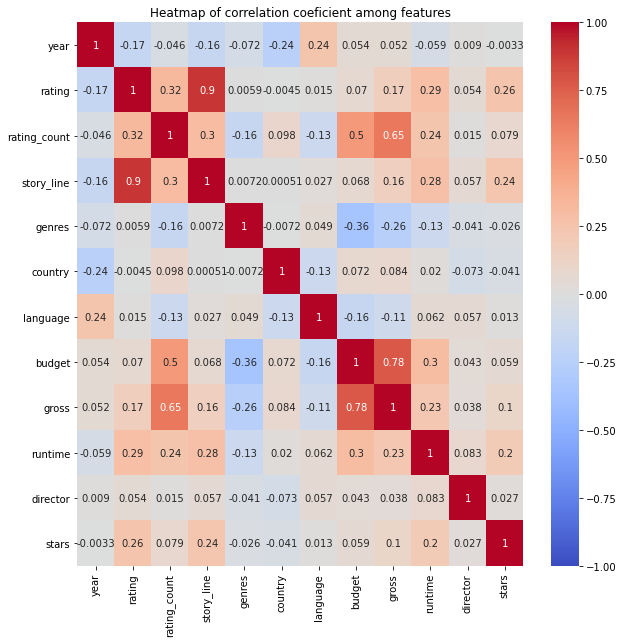

In [32]:
plt.figure(figsize = (10,10))
plt.title("Heatmap of correlation coeficient among features")
sns.heatmap(data_.corr(),vmin = -1, vmax = 1,cmap = 'coolwarm',annot = True)
plt.show()

## Save to CSV

In [33]:
data_.to_csv('data/preprocessed.csv')

In [34]:
read=pd.read_csv('data/preprocessed.csv')
read

,movie_id,name,year,rating,rating_count,story_line,genres,country,language,budget,gross,runtime,director,stars
0,2077677,3Simoa,2012.0,6.4,370,1581.0,99,99,144,334784.0,93296,86,795,6.165869
1,106332,Ba wang bie ji,1993.0,8.1,24830,1826.2,182,63,187,4000000.0,5985074,171,445,6.187815
2,116421,The Glimmer Man,1996.0,5.4,18687,900.0,16,224,46,45000000.0,20351264,91,386,6.149547
3,3170832,Room,2015.0,8.1,365849,2081.4,195,53,64,13000000.0,35401758,118,485,6.154384
4,204175,Boys and Girls,2000.0,5.4,15942,607.4,116,224,64,35000000.0,25850615,94,696,6.161788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2083231,Java Heat,2013.0,5.1,4629,455.0,26,161,108,15000000.0,189739,104,151,6.162267
989,2158531,Holla II,2013.0,6.6,87,1666.4,128,224,64,1000000.0,41537,90,297,6.159905
990,79945,Star Trek: The Motion Picture,1979.0,6.4,81000,1173.2,76,224,117,35000000.0,82604699,132,702,6.169162
991,1653649,Chuzhaya,2010.0,6.5,873,1704.0,28,203,198,4000000.0,1838858,100,60,6.172280
